### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas_profiling as pp
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.model_selection import train_test_split

### Importing Data: 

In [2]:
raw_data = pd.read_csv("bank-full.csv", sep=";")
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis:

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Categorial data
cat_data = raw_data.select_dtypes(exclude='number')
cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [5]:
# Numerical data
num_data = raw_data.select_dtypes(include='number')
num_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### the value of pdays if -1 means the person is not contacted. So we can make a new feature i.e. if a person was contacted or not.

In [7]:
raw_data["pdays_no_contact"] = (raw_data["pdays"] == -1) * 1
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_no_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1


In [8]:
# Checking how many values are there in categorical data
for col in cat_data:
    print(col, "\n")
    print(cat_data[col].value_counts())
    print("_____________","\n\n")

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
_____________ 


marital 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
_____________ 


education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
_____________ 


default 

no     44396
yes      815
Name: default, dtype: int64
_____________ 


housing 

yes    25130
no     20081
Name: housing, dtype: int64
_____________ 


loan 

no     37967
yes     7244
Name: loan, dtype: int64
_____________ 


contact 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
_____________ 


month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     26

#### Is there a balance between yes and no in our data? 

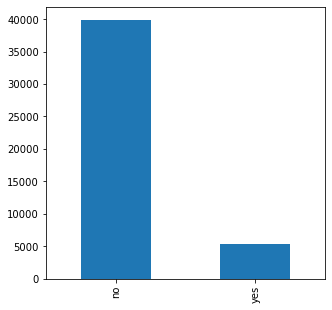

In [9]:
plt.rcParams["figure.figsize"] = (5,5)
raw_data["y"].value_counts().plot.bar()

###### Observation: We can see that the data is imbalanced as there are more No values than Yes values therefor the model may be biased

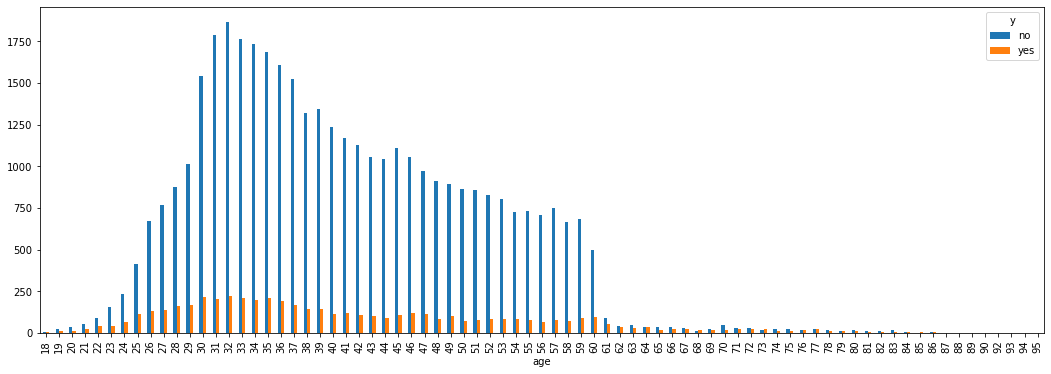

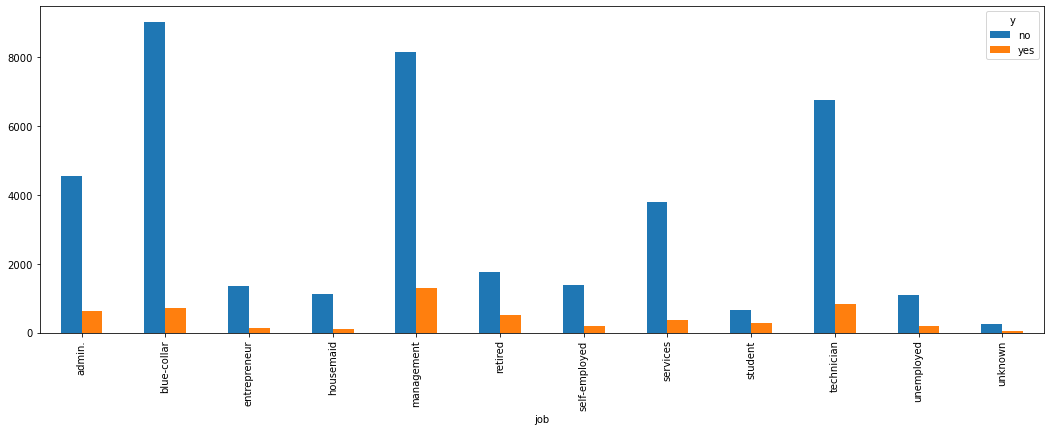

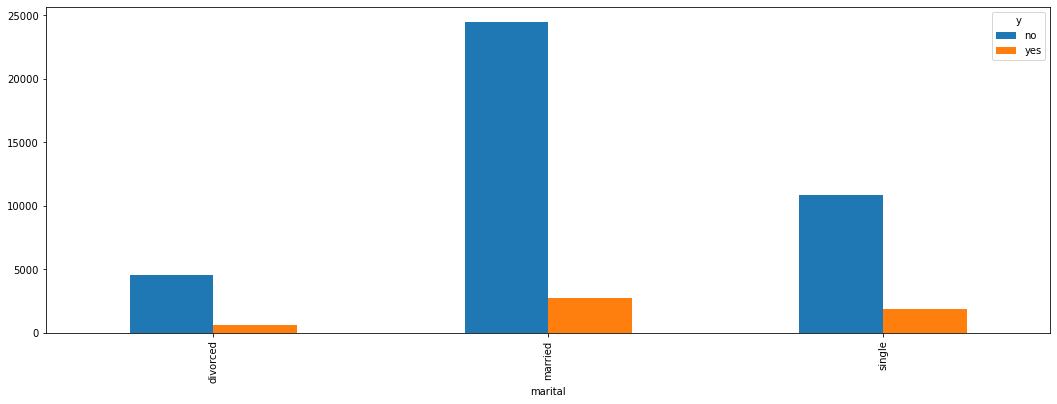

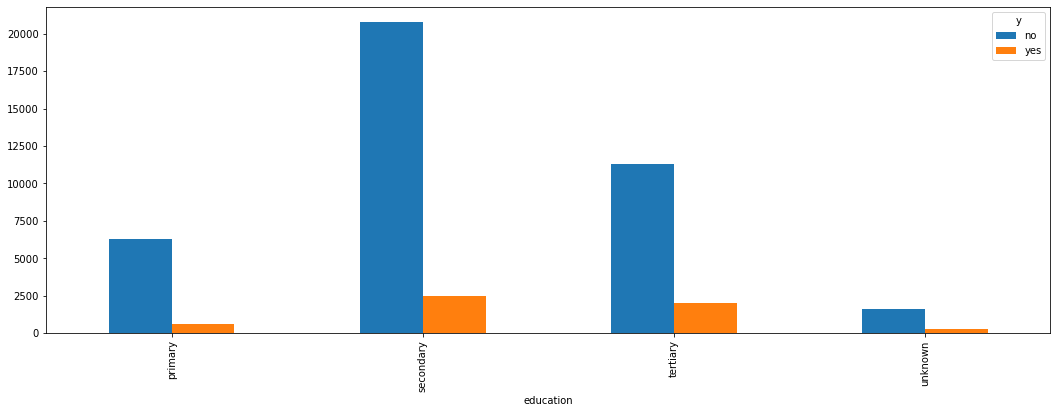

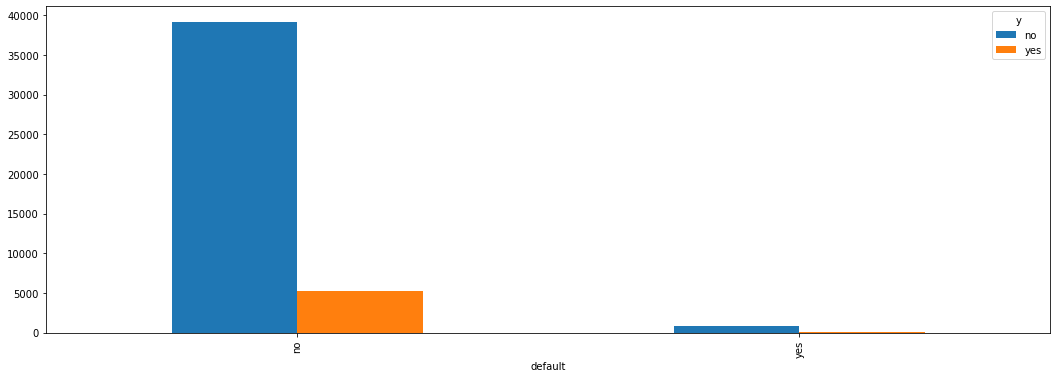

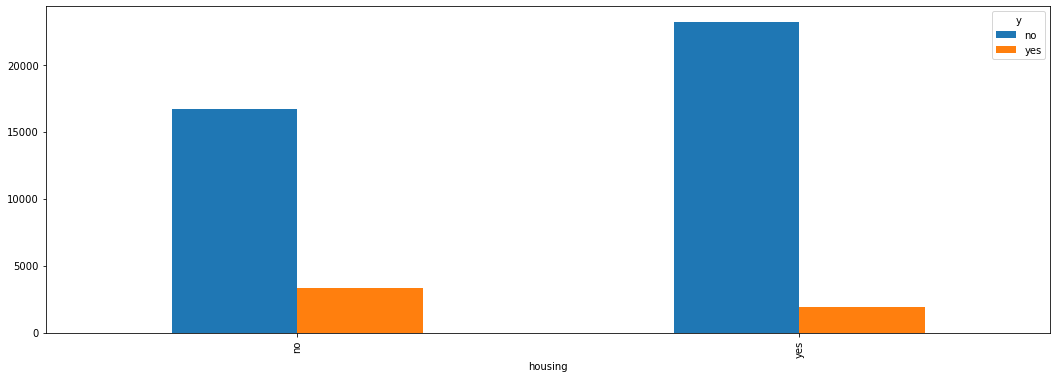

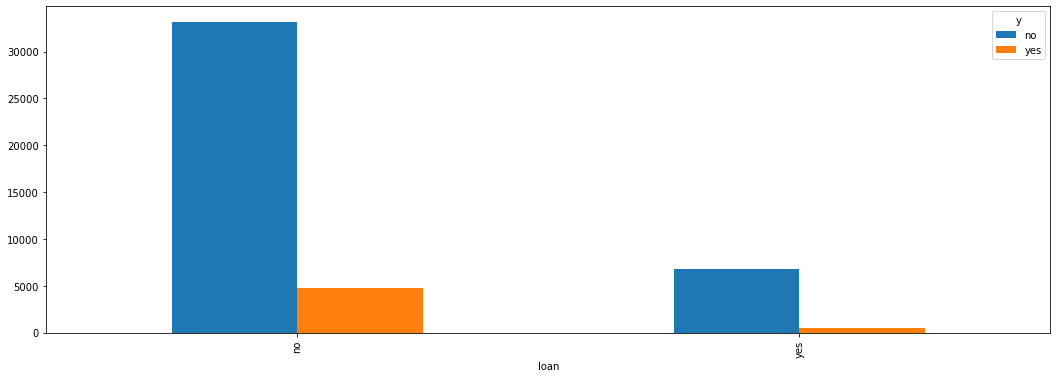

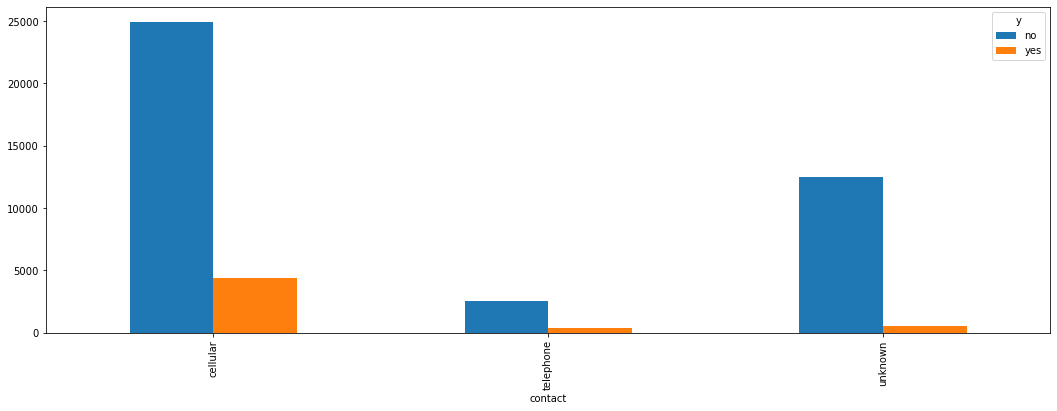

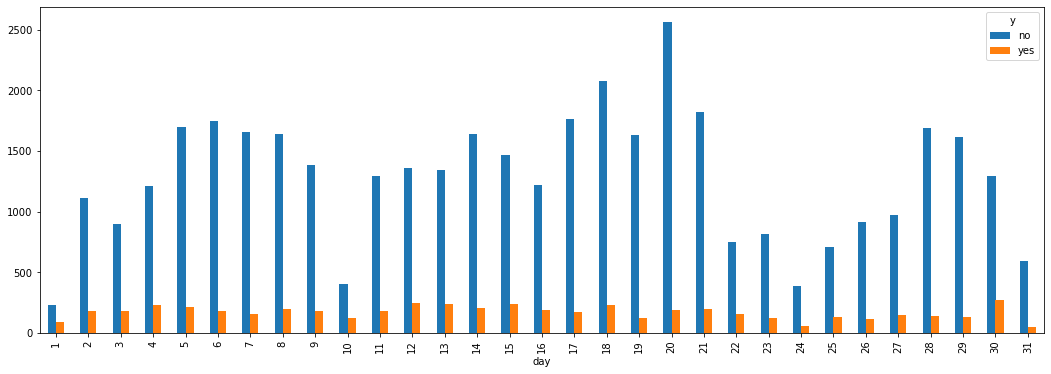

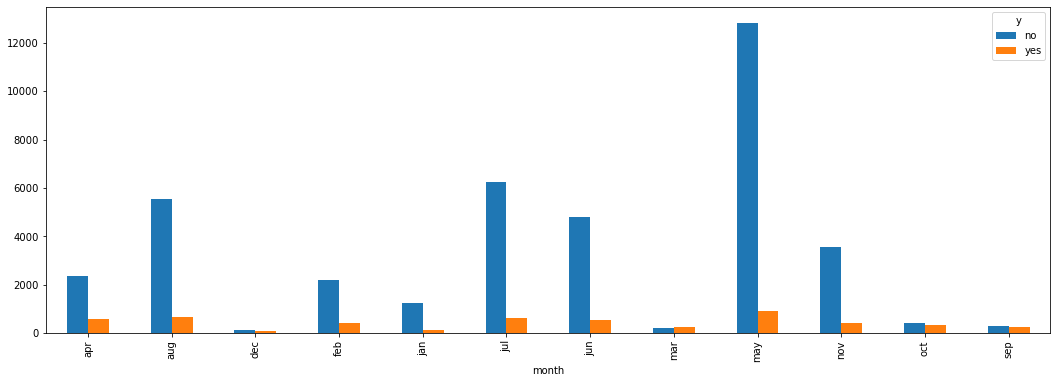

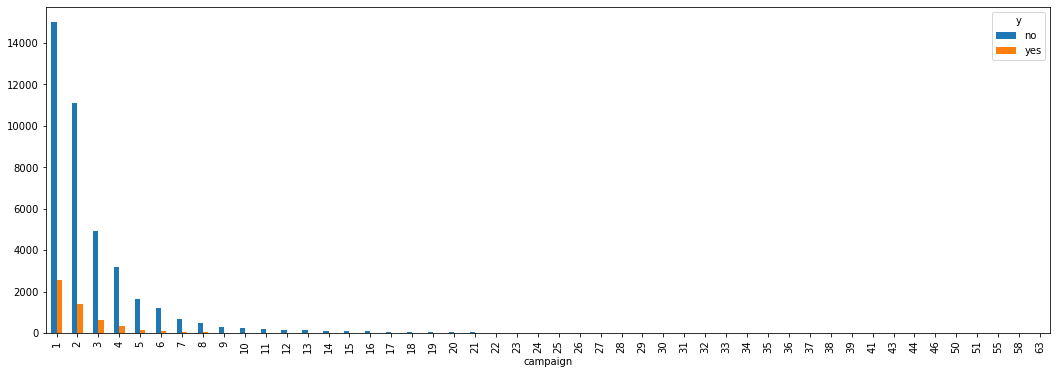

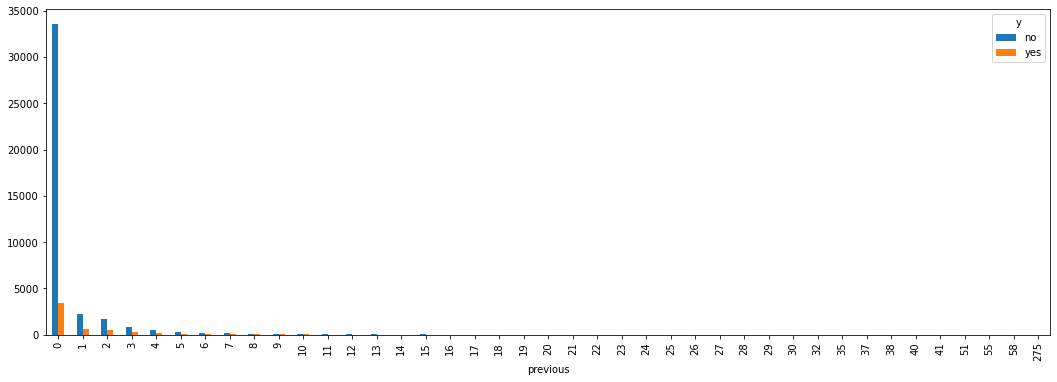

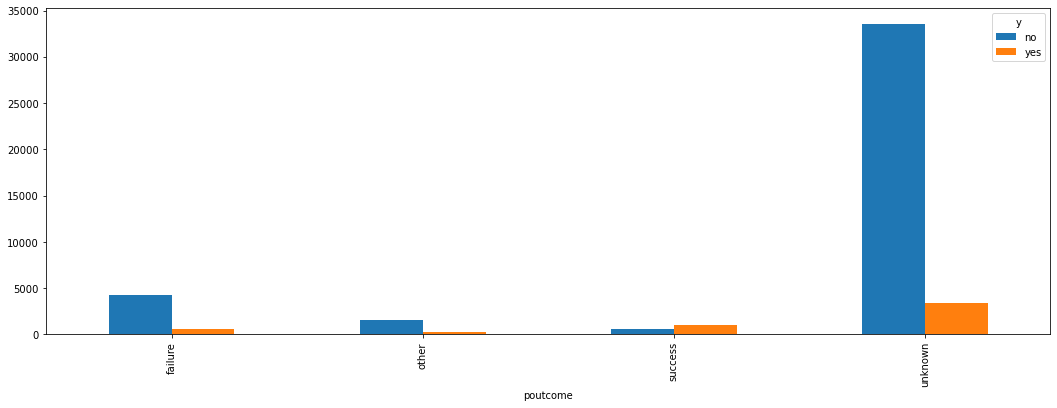

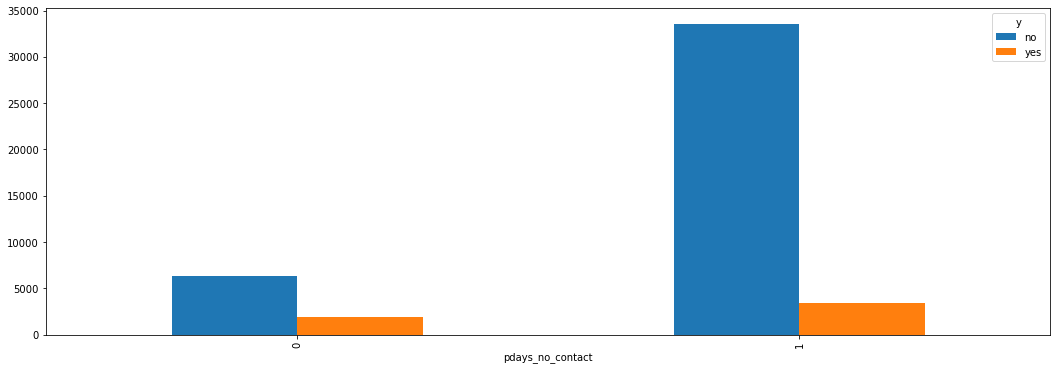

In [10]:
# Visualizing the data to see if there is any relation of the dependant variable with the independant variables
not_plot = ["balance", "duration", "pdays", "y"] # not plotting this due to high data and y as it is dependant

for col in raw_data.columns:
    if col not in not_plot:  
        plt.rcParams["figure.figsize"] = (18,6)
        pd.crosstab(raw_data[col],raw_data.y).plot(kind="bar")

In [11]:
# Quick EDA. The file with all the EDA can be found in the root folder
EDA_report= pp.ProfileReport(raw_data)
EDA_report.to_file(output_file='EDA_report.html')

In [12]:
# Changing the Binary categorical data to 0 & 1
data = raw_data.copy()
data["housing"] = data["housing"].map({"yes":1, "no":0})
data["loan"] = data["loan"].map({"yes":1, "no":0})
data["y"] = data["y"].map({"yes":1, "no":0})
data["default"] = data["default"].map({"yes":0, "no":1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_no_contact
0,58,management,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1
2,33,entrepreneur,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,47,blue-collar,married,unknown,1,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,single,unknown,1,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,divorced,primary,1,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,retired,married,secondary,1,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,1,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,1


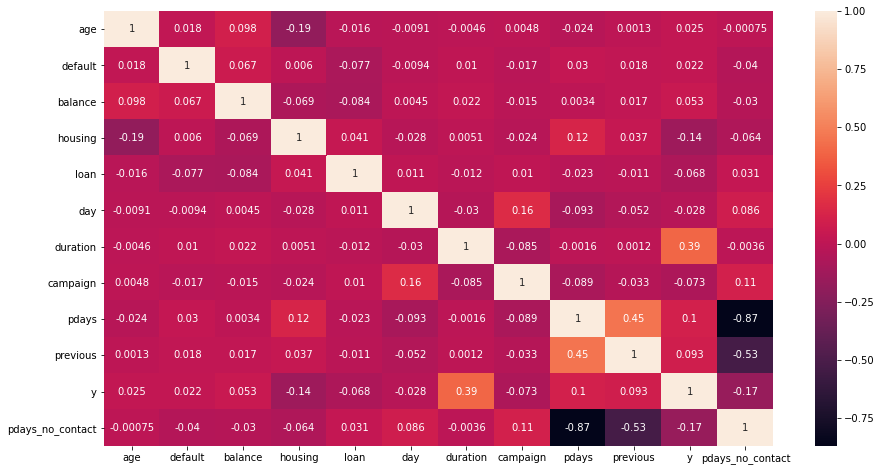

In [13]:
# Checking the correlation
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [14]:
# getting the dummies for the rest of the categorical data

data = pd.get_dummies(data, columns=["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome"], drop_first=True)

### Training the logistic regression model:

In [15]:
x = data.loc[:,data.columns != "y"]
y = data["y"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [16]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train,y_train)

LogisticRegression()

#### Prediction:

In [18]:
x = scaler.fit_transform(x)
y_pred = log_reg_model.predict(x)
data["predicted"] = y_pred
data

,age,default,balance,day,duration,campaign,pdays,previous,y,pdays_no_contact,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,predicted
0,58,1,2143,5,261,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,1,29,5,151,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,33,1,2,5,76,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,47,1,1506,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,33,1,1,5,198,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,17,977,3,-1,0,1,1,...,0,0,0,1,0,0,0,0,1,1
45207,71,1,1729,17,456,2,-1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
45208,72,1,5715,17,1127,5,184,3,1,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,1,668,17,508,4,-1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


#### Confusion marix:

In [20]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
confusion_matrix

array([[38906,  1016],
       [ 3409,  1880]], dtype=int64)

In [21]:
pd.crosstab(y, y_pred)

col_0,0,1
y,,
0,38906,1016
1,3409,1880


#### Accuracy:

In [22]:
train_accuracy = log_reg_model.score(x_train,y_train)
test_accuracy = log_reg_model.score(x_test,y_test)


print(f'''Train Accuracy: {train_accuracy}
Test Accuracy: {test_accuracy}''')

Train Accuracy: 0.9035927576073561
Test Accuracy: 0.8992922441757594


In [23]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     39922
           1       0.65      0.36      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.67      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [24]:
Logit_roc_score=roc_auc_score(y,log_reg_model.predict(x))
Logit_roc_score

0.6650025452828326

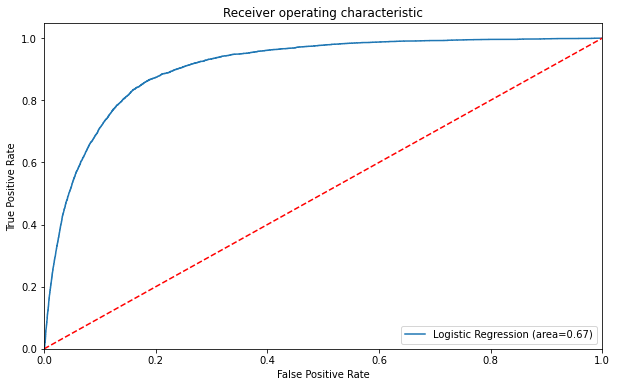

In [25]:
fpr, tpr, thresholds = roc_curve(y,log_reg_model.predict_proba(x)[:,1]) 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [26]:
y_prob1 = pd.DataFrame(log_reg_model.predict_proba(x_train)[:,1]) 
y_prob1

,0
0,0.009754
1,0.055325
2,0.009851
3,0.009689
4,0.034421
...,...
31642,0.082745
31643,0.019076
31644,0.060668
31645,0.164594


## Using the logit model:

In [27]:
logit = sm.Logit(y,x) 

In [28]:
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.614936
         Iterations 8


In [29]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                 -0.7040
Time:                        19:50:00   Log-Likelihood:                -27802.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0163      0.013      1.217      0.224      -0.010       0.043
x2             0.0002      0.010      0.023      0.982      -0.019       0.020
x3             0.0159      0.011      1.514      0.130      -0.005       0.037
x4             0.0454      0.012      3.814      0.000       0.022       0.069
x5             0.6567      0.013     49.279      0.000       0.631       0.683
x6            -0.0124      0.011     -1.141      0.254      -0.034       0.009
x7            -0.0309      0.023     -1.326      0.185      -0.077       0.015
x8             0.0131      0.014      0.960      0.337      -0.014       0.040
x9            -0.1452      0.417     -0.348      0.728      -0.962       0.672
x10           -0.0324      0.016     -2.024      0.043      -0.064      -0.001
x11           -0.0181      0.011     -1.572      0.116      -0.041       0.004
x12           -0.0249      0.012     -2.161      0.031      -0.048      -0.002
x13           -0.0155      0.018     -0.879      0.379      -0.050       0.019
x14            0.0259      0.013      1.935      0.053      -0.000       0.052
x15           -0.0170      0.012     -1.460      0.144      -0.040       0.006
x16           -0.0133      0.013     -1.026      0.305      -0.039       0.012
x17            0.0489      0.012      4.153      0.000       0.026       0.072
x18           -0.0161      0.015     -1.091      0.275      -0.045       0.013
x19           -0.0033      0.011     -0.293      0.769      -0.026       0.019
x20           -0.0102      0.011     -0.955      0.339      -0.031       0.011
x21           -0.0263      0.016     -1.630      0.103      -0.058       0.005
x22            0.0183      0.017      1.066      0.286      -0.015       0.052
x23            0.0134      0.016      0.823      0.411      -0.019       0.045
x24            0.0494      0.019      2.641      0.008       0.013       0.086
x25            0.0076      0.012      0.649      0.516      -0.015       0.030
x26           -0.1083      0.012     -8.876      0.000      -0.132      -0.084
x27           -0.0373      0.010     -3.601      0.000      -0.058      -0.017
x28           -0.0063      0.011     -0.587      0.557      -0.027       0.015
x29           -0.1769      0.016    -11.179      0.000      -0.208      -0.146
x30           -0.1061      0.018     -5.984      0.000      -0.141      -0.071
x31            0.0608      0.013      4.612      0.000       0.035       0.087
x32           -0.0100      0.014     -0.709      0.479      -0.038       0.018
x33           -0.0878      0.012     -7.026      0.000      -0.112      -0.063
x34           -0.1140      0.018     -6.468      0.000      -0.149      -0.079
x35            0.0327      0.019      1.725      0.085      -0.004       0.070
x36            0.1701      0.015     11.538      0.000       0.141       0.199
x37           -0.0571      0.022     -2.604      0.009      -0.100      -0.014
x38           -0.0935      0.015     -6.210      0.000      -0.123      -0.064
x3

In [30]:
y_pred_logit = logit_model.predict()
y_pred_logit

array([0.36941446, 0.30157027, 0.21375977, ..., 0.99938003, 0.59726535,
       0.54561707])

In [31]:
logit_model.pred_table()

array([[31483.,  8439.],
       [  666.,  4623.]])

In [32]:
cm_df = pd.DataFrame(logit_model.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0:"Actual 0", 1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,31483.0,8439.0
Actual 1,666.0,4623.0


In [33]:
logit_accuracy = (cm_df.iloc[0,0] + cm_df.iloc[1,1])/ data.shape[0]
logit_accuracy

0.7986109575103404

### Backward Elimination:

#### Removing insignificant data:

In [34]:
significant_features = []

p = logit_model.pvalues.to_dict()

for key, val in p.items():
    if val <= 0.05:
        num = key
        significant_features.append(int(num[1:])-1)
        
significant_features

[3, 4, 9, 11, 16, 23, 25, 26, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 41]

In [35]:
x = pd.DataFrame(x)
x = x[significant_features]
x

,3,4,9,11,16,23,25,26,28,29,30,32,33,35,36,37,38,39,41
0,-1.298476,0.011016,-0.523740,-0.16793,-0.145557,1.548892,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
1,-1.298476,-0.416127,-0.523740,-0.16793,-0.145557,-0.645623,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
2,-1.298476,-0.707361,-0.523740,-0.16793,-0.145557,-0.645623,0.893915,2.289359,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
3,-1.298476,-0.645231,1.909346,-0.16793,-0.145557,-0.645623,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
4,-1.298476,-0.233620,-0.523740,-0.16793,-0.145557,-0.645623,-1.118674,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.143418,2.791329,-0.523740,-0.16793,-0.145557,1.548892,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948
45207,0.143418,0.768224,-0.523740,-0.16793,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948
45208,0.143418,3.373797,-0.523740,-0.16793,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,5.377848
45209,0.143418,0.970146,1.909346,-0.16793,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948


#### Model_2:

In [36]:
logit = sm.Logit(y,x)
logit_model_2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.615484
         Iterations 8


In [37]:
logit_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45192
Method:                           MLE   Df Model:                           18
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                 -0.7055
Time:                        19:50:45   Log-Likelihood:                -27827.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3              0.0416      0.011      3.731      0.000       0.020       0.063
4              0.6592      0.013     49.843      0.000       0.633       0.685
9             -0.0299      0.011     -2.738      0.006      -0.051      -0.009
11            -0.0232      0.010     -2.254      0.024      -0.043      -0.003
16             0.0574      0.011      5.348      0.000       0.036       0.078
23             0.0343      0.011      3.155      0.002       0.013       0.056
25            -0.1172      0.012    -10.000      0.000      -0.140      -0.094
26            -0.0398      0.010     -3.879      0.000      -0.060      -0.020
28            -0.1640      0.012    -13.467      0.000      -0.188      -0.140
29            -0.1223      0.013     -9.474      0.000      -0.148      -0.097
30             0.0616      0.013      4.756      0.000       0.036       0.087
32            -0.0885      0.011     -7.700      0.000      -0.111      -0.066
33            -0.1308      0.013     -9.994      0.000      -0.156      -0.105
35             0.1698      0.014     11.866      0.000       0.142       0.198
36            -0.0777      0.014     -5.718      0.000      -0.104      -0.051
37            -0.0987      0.012     -8.190      0.000      -0.122      -0.075
38             0.1198      0.012      9.641      0.000       0.095       0.144
39             0.1148      0.013      8.802      0.000       0.089       0.140
41             0.9254      0.043     21.570      0.000       0.841       1.009
==============================================================================
"""

###### Observation: the model has one insignificant feature

In [38]:
y_pred_logit_2 = logit_model_2.predict()
y_pred_logit_2

array([0.37364295, 0.29452104, 0.23612551, ..., 0.99929167, 0.60962243,
       0.53548932])

In [39]:
logit_model_2.pred_table()

array([[31540.,  8382.],
       [  697.,  4592.]])

In [40]:
cm_df = pd.DataFrame(logit_model_2.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0:"Actual 0", 1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,31540.0,8382.0
Actual 1,697.0,4592.0


In [41]:
logit_accuracy = (cm_df.iloc[0,0] + cm_df.iloc[1,1])/ data.shape[0]
logit_accuracy

0.7991860387958682

#### Removing insignificant data:

In [42]:
new_significant = []

for i in significant_features:
    if i != 11:
        new_significant.append(i)


In [43]:
x = x[new_significant]
x

,3,4,9,16,23,25,26,28,29,30,32,33,35,36,37,38,39,41
0,-1.298476,0.011016,-0.523740,-0.145557,1.548892,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
1,-1.298476,-0.416127,-0.523740,-0.145557,-0.645623,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
2,-1.298476,-0.707361,-0.523740,-0.145557,-0.645623,0.893915,2.289359,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
3,-1.298476,-0.645231,1.909346,-0.145557,-0.645623,0.893915,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
4,-1.298476,-0.233620,-0.523740,-0.145557,-0.645623,-1.118674,-0.436803,1.572395,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.185948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.143418,2.791329,-0.523740,-0.145557,1.548892,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948
45207,0.143418,0.768224,-0.523740,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948
45208,0.143418,3.373797,-0.523740,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,5.377848
45209,0.143418,0.970146,1.909346,-0.145557,-0.645623,-1.118674,-0.436803,-0.635972,-0.400409,-0.068963,-0.178958,-0.424206,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.185948


#### model_3:

In [44]:
logit = sm.Logit(y,x)
logit_model_3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.615540
         Iterations 8


In [45]:
logit_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                 -0.7057
Time:                        19:51:23   Log-Likelihood:                -27829.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3              0.0416      0.011      3.729      0.000       0.020       0.063
4              0.6594      0.013     49.848      0.000       0.633       0.685
9             -0.0274      0.011     -2.518      0.012      -0.049      -0.006
16             0.0583      0.011      5.435      0.000       0.037       0.079
23             0.0367      0.011      3.390      0.001       0.015       0.058
25            -0.1159      0.012     -9.902      0.000      -0.139      -0.093
26            -0.0392      0.010     -3.823      0.000      -0.059      -0.019
28            -0.1647      0.012    -13.529      0.000      -0.189      -0.141
29            -0.1226      0.013     -9.496      0.000      -0.148      -0.097
30             0.0616      0.013      4.760      0.000       0.036       0.087
32            -0.0882      0.011     -7.676      0.000      -0.111      -0.066
33            -0.1313      0.013    -10.033      0.000      -0.157      -0.106
35             0.1699      0.014     11.874      0.000       0.142       0.198
36            -0.0766      0.014     -5.638      0.000      -0.103      -0.050
37            -0.0984      0.012     -8.162      0.000      -0.122      -0.075
38             0.1198      0.012      9.643      0.000       0.095       0.144
39             0.1148      0.013      8.808      0.000       0.089       0.140
41             0.9254      0.043     21.574      0.000       0.841       1.010
==============================================================================
"""

In [46]:
logit_model_3.pred_table()

array([[31547.,  8375.],
       [  707.,  4582.]])

In [47]:
cm_df = pd.DataFrame(logit_model_3.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0:"Actual 0", 1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,31547.0,8375.0
Actual 1,707.0,4582.0


In [48]:
logit3_accuracy = (cm_df.iloc[0,0] + cm_df.iloc[1,1])/ data.shape[0]
logit3_accuracy

0.7991196832629227

In [49]:
all_cols = list(data.columns)

final_cols = []

for i in new_significant:
    final_cols.append(all_cols[i])

print(f"The significant features for our logit model are {final_cols}")

The significant features for our logit model are ['day', 'duration', 'pdays_no_contact', 'job_services', 'education_secondary', 'education_unknown', 'housing_1', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jan', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_other']


### Conclusion:

###### The accuracy of the models are given in the below table`

In [50]:
model_table = pd.DataFrame({
    "Model": ["logistic regression model", "logit model"],
    "accuracy": [test_accuracy, logit3_accuracy]
})
model_table

,Model,accuracy
0,logistic regression model,0.899292
1,logit model,0.799120
